## Weights and Biases

In [ ]:
import torch
import torch.nn as nn

# Define a simple neural network layer
class NeuralNetworkLayer(nn.Module):
    def __init__(self, input_size, output_size):
        super(NeuralNetworkLayer, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

        # Initialize weights and biases
        nn.init.normal_(self.linear.weight, mean=0, std=0.01)
        nn.init.constant_(self.linear.bias, 0)

    def forward(self, x):
        return self.linear(x)

# Create an instance of the neural network layer
input_size = 5
output_size = 3
layer = NeuralNetworkLayer(input_size, output_size)

# Print weights and biases
print("Weights:")
print(layer.linear.weight)
print("\nBiases:")
print(layer.linear.bias)


Weights:
Parameter containing:
tensor([[-0.0042,  0.0247, -0.0006,  0.0080, -0.0003],
        [-0.0020, -0.0001,  0.0002, -0.0036,  0.0154],
        [-0.0074, -0.0066,  0.0093,  0.0153, -0.0043]], requires_grad=True)

Biases:
Parameter containing:
tensor([0., 0., 0.], requires_grad=True)


## Feedforward and Backpropagation

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the neural network model
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Define input size, hidden layer size, output size, and learning rate
input_size = 3
hidden_size = 5
output_size = 1
learning_rate = 0.01

# Create the neural network
model = NeuralNetwork(input_size, hidden_size, output_size)

# Define the loss function and the optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Example data
x_train = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]])
y_train = torch.tensor([[2.0], [5.0], [8.0]])

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x_train)
    loss = criterion(outputs, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Test the model
with torch.no_grad():
    y_pred = model(x_train)
    print("Feedforward Output:")
    print(y_pred)
    print("Backpropagation Values:")
    for name, param in model.named_parameters():
        if param.requires_grad:
            print(name, param.grad)


Epoch [10/100], Loss: 21.6823
Epoch [20/100], Loss: 16.4696
Epoch [30/100], Loss: 12.9896
Epoch [40/100], Loss: 10.6663
Epoch [50/100], Loss: 9.1153
Epoch [60/100], Loss: 8.0798
Epoch [70/100], Loss: 7.3885
Epoch [80/100], Loss: 6.9270
Epoch [90/100], Loss: 6.6188
Epoch [100/100], Loss: 6.4131
Feedforward Output:
tensor([[4.3701],
        [4.3701],
        [4.3701]])
Backpropagation Values:
fc1.weight tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
fc1.bias tensor([0., 0., 0., 0., 0.])
fc2.weight tensor([[0., 0., 0., 0., 0.]])
fc2.bias tensor([-1.2855])


170500096/170498071 [==============================] - 3029s 18us/step
Epoch 1/10
1563/1563 [==============================] - 14s 3ms/step - loss: 1.4918 - accuracy: 0.4582 - val_loss: 1.2818 - val_accuracy: 0.5475
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1254 - accuracy: 0.6046 - val_loss: 1.0680 - val_accuracy: 0.6263
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9586 - accuracy: 0.6622 - val_loss: 0.8930 - val_accuracy: 0.6923
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8530 - accuracy: 0.7006 - val_loss: 0.8970 - val_accuracy: 0.6863
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7823 - accuracy: 0.7249 - val_loss: 0.8703 - val_accuracy: 0.6997
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7206 - accuracy: 0.7458 - val_loss: 0.8502 - val_accuracy: 0.7067
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/s

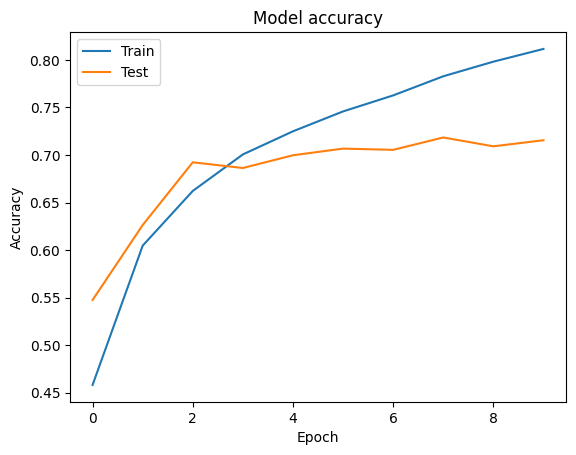

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and preprocess your dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


## Recurrent Neural Networks (RNNs)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Generate sample data
import numpy as np
X_train = np.random.random((1000, 10, 64))  # 1000 samples, 10 time steps, 64 features
y_train = np.random.randint(2, size=(1000, 1))  # 1000 samples, binary target

# Define the RNN model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(10, 64)))  # 50 units, 10 time steps, 64 features
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_train, y_train)
print('Loss:', loss)
print('Accuracy:', accuracy)


Epoch 1/10
32/32 [==============================] - 1s 7ms/step - loss: 0.7121 - accuracy: 0.5230
Epoch 2/10
32/32 [==============================] - 0s 7ms/step - loss: 0.6896 - accuracy: 0.5410
Epoch 3/10
32/32 [==============================] - 0s 7ms/step - loss: 0.6770 - accuracy: 0.5920
Epoch 4/10
32/32 [==============================] - 0s 7ms/step - loss: 0.6760 - accuracy: 0.5730
Epoch 5/10
32/32 [==============================] - 0s 8ms/step - loss: 0.6697 - accuracy: 0.5980
Epoch 6/10
32/32 [==============================] - 0s 8ms/step - loss: 0.6435 - accuracy: 0.6330
Epoch 7/10
32/32 [==============================] - 0s 8ms/step - loss: 0.6267 - accuracy: 0.6530
Epoch 8/10
32/32 [==============================] - 0s 9ms/step - loss: 0.6104 - accuracy: 0.6690
Epoch 9/10
32/32 [==============================] - 0s 9ms/step - loss: 0.5843 - accuracy: 0.6940
Epoch 10/10
32/32 [==============================] - 0s 3ms/step - loss: 0.5212 - accuracy: 0.7570
Loss: 0.52122950553